In [22]:
import pandas as pd
data = pd.read_csv('/content/all_songs_data.csv')
print(data.head())


                                 Album  \
0                Battle of New Orleans   
1                           That’s All   
2       “Mr Personality’s” 15 Big Hits   
3  The Greatest Hits Of Frankie Avalon   
4           Paul Anka Sings His Big 15   

                                           Album URL          Artist  \
0  https://genius.com/albums/Johnny-horton/Battle...   Johnny Horton   
1   https://genius.com/albums/Bobby-darin/That-s-all     Bobby Darin   
2  https://genius.com/albums/Lloyd-price/Mr-perso...     Lloyd Price   
3  https://genius.com/albums/Frankie-avalon/The-g...  Frankie Avalon   
4  https://genius.com/albums/Paul-anka/Paul-anka-...       Paul Anka   

  Featured Artists                                             Lyrics  \
0               []  [Verse 1] In 1814 we took a little trip Along ...   
1               []  Oh the shark, babe Has such teeth, dear And he...   
2               []  Over and over I tried to prove my love to you ...   
3               []  He

In [23]:
# Descriptive statistics for numerical columns
print(data.describe())

# Descriptive statistics for categorical columns
print(data.describe(include='object'))


              Rank         Year
count  6500.000000  6500.000000
mean     50.500000  1991.000000
std      28.868291    18.763106
min       1.000000  1959.000000
25%      25.750000  1975.000000
50%      50.500000  1991.000000
75%      75.250000  2007.000000
max     100.000000  2023.000000
                Album                                          Album URL  \
count            6036                                               6036   
unique           4202                                               4285   
top     Greatest Hits  https://genius.com/albums/Morgan-wallen/One-th...   
freq               21                                                  9   

         Artist Featured Artists          Lyrics Media Release Date  \
count      6500             6384            6384  6384         4563   
unique     3181              612            6044  5054         3233   
top     Madonna               []  [Instrumental]    []   2022-05-06   
freq         35             5492              2

In [17]:
rank_stats = data['Rank'].describe()
rank_frequency = data['Rank'].value_counts().sort_index()
top_artists = data['Artist'].value_counts().head(10)

print("Descriptive Statistics for Song Ranks:")
print(rank_stats)
print("\nFrequency of Songs by Rank:")
print(rank_frequency)
print("\nTop 10 Artists by Number of Songs:")
print(top_artists)


Descriptive Statistics for Song Ranks:
count    6500.000000
mean       50.500000
std        28.868291
min         1.000000
25%        25.750000
50%        50.500000
75%        75.250000
max       100.000000
Name: Rank, dtype: float64

Frequency of Songs by Rank:
Rank
1      65
2      65
3      65
4      65
5      65
       ..
96     65
97     65
98     65
99     65
100    65
Name: count, Length: 100, dtype: int64

Top 10 Artists by Number of Songs:
Artist
Madonna            35
Mariah Carey       29
Taylor Swift       28
Beatles            27
Elton John         26
Stevie Wonder      22
Rihanna            22
Michael Jackson    22
Janet Jackson      21
Whitney Houston    20
Name: count, dtype: int64


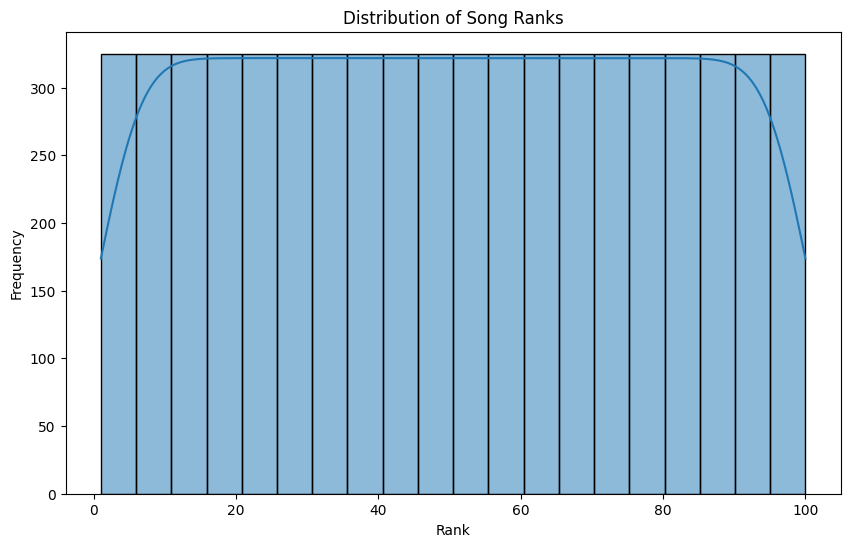

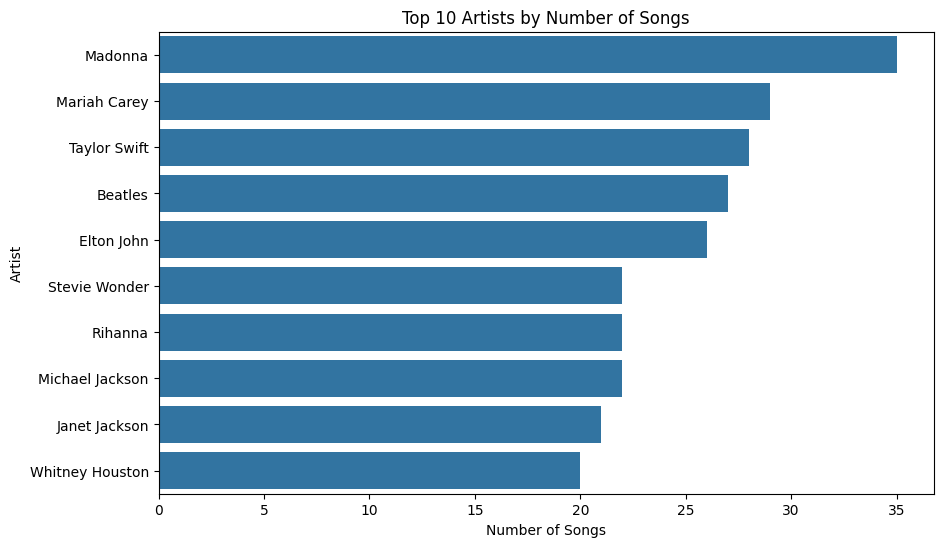

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['Rank'], bins=20, kde=True)
plt.title('Distribution of Song Ranks')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.show()

top_artists = data['Artist'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_artists.values, y=top_artists.index)
plt.title('Top 10 Artists by Number of Songs')
plt.xlabel('Number of Songs')
plt.ylabel('Artist')
plt.show()


In [28]:
# Converting 'Release Date' to datetime
data['Release Date'] = pd.to_datetime(data['Release Date'])

data['Year'] = data['Release Date'].dt.year


In [29]:
rank_year_corr = data[['Year', 'Rank']].groupby('Year').mean().reset_index()
rank_year_corr['Rank'] = rank_year_corr['Rank'].round(2)

correlation = data['Year'].corr(data['Rank'])

top_artists = data['Artist'].value_counts().head(10).index
rank_distribution_top_artists = data[data['Artist'].isin(top_artists)].groupby('Artist')['Rank'].describe()

print("Average Rank by Year:")
print(rank_year_corr)
print("\nCorrelation between Year and Rank:")
print(correlation)
print("\nRank Distribution by Top 10 Artists:")
print(rank_distribution_top_artists)


Average Rank by Year:
      Year   Rank
0   1877.0  26.00
1   1922.0  70.00
2   1955.0  52.00
3   1957.0  77.00
4   1958.0  72.00
..     ...    ...
66  2020.0  52.36
67  2021.0  45.94
68  2022.0  48.67
69  2023.0  53.90
70  2024.0  82.00

[71 rows x 2 columns]

Correlation between Year and Rank:
0.04014067434061861

Rank Distribution by Top 10 Artists:
                 count       mean        std   min    25%   50%    75%    max
Artist                                                                       
Beatles           27.0  42.777778  31.624398   1.0  15.00  40.0  68.50   96.0
Elton John        26.0  47.038462  29.200659   1.0  21.75  45.5  72.50   95.0
Janet Jackson     21.0  38.619048  21.973794   4.0  19.00  38.0  49.00   84.0
Madonna           35.0  49.285714  28.678308   2.0  27.00  51.0  73.00   99.0
Mariah Carey      29.0  33.724138  24.335301   1.0  15.00  26.0  50.00   78.0
Michael Jackson   22.0  47.409091  30.316833   2.0  20.25  53.0  67.50   93.0
Rihanna           22.

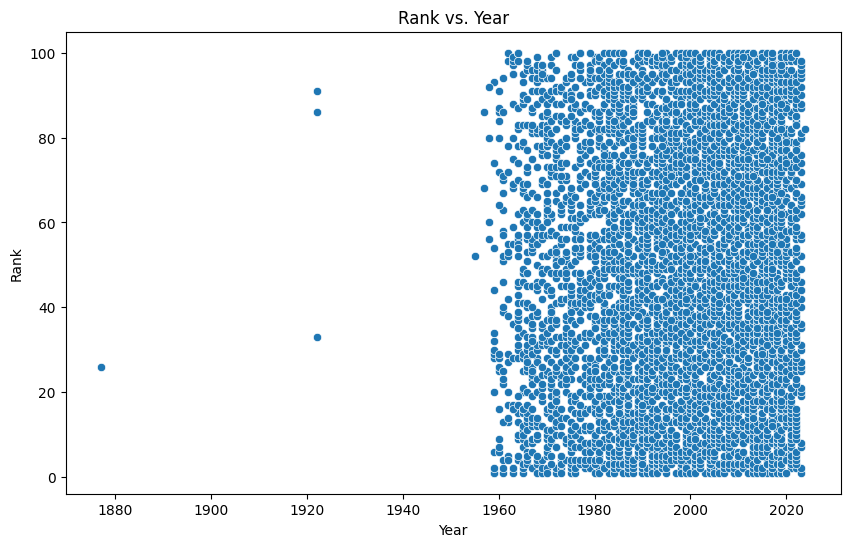

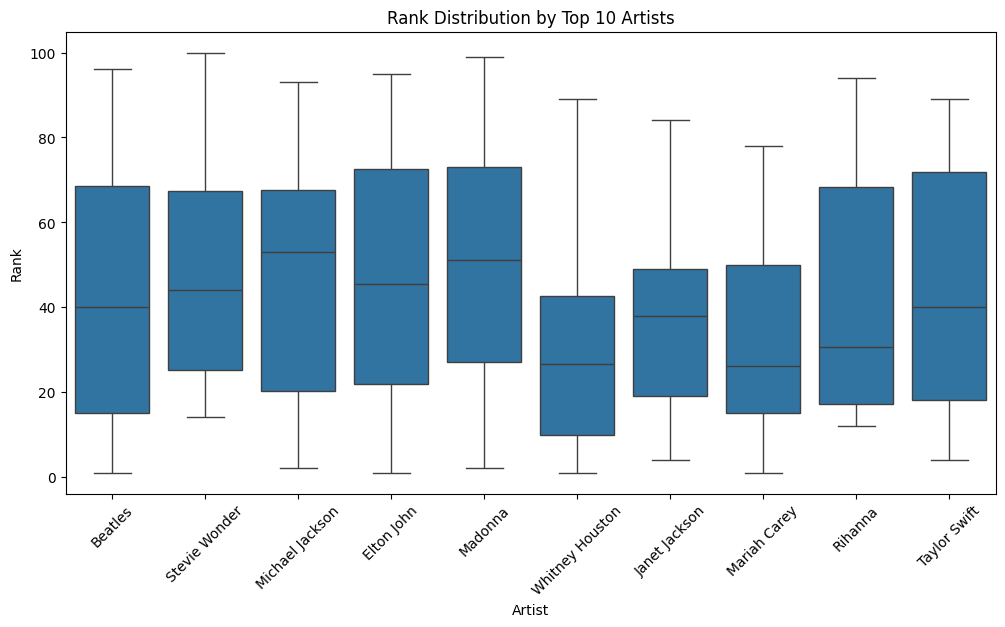

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Year', y='Rank', data=data)
plt.title('Rank vs. Year')
plt.xlabel('Year')
plt.ylabel('Rank')
plt.show()

top_artists = data['Artist'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='Artist', y='Rank', data=data[data['Artist'].isin(top_artists)])
plt.title('Rank Distribution by Top 10 Artists')
plt.xlabel('Artist')
plt.ylabel('Rank')
plt.xticks(rotation=45)
plt.show()
